In [100]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [101]:
# Function to simulate one path of the stock price using Geometric Brownian Motion (GBM)

def simulate_gbm(S0, mu, sigma, T, N):
    dt = T / N  # Time step
    prices = [S0]  # List to store the stock prices, starting with the initial price
    for i in range(1, N):
        Z = random.gauss(0, 1)  # Generate a random number from a standard normal distribution
        price = prices[i-1] * math.exp((mu - 0.5 * sigma**2) * dt + sigma * math.sqrt(dt) * Z)
        prices.append(price)
    return prices

In [102]:
# Function to simulate multiple paths
def simulate_multiple_paths(S0, mu, sigma, T, N, M):
    all_prices = []  # List to store multiple simulated paths
    for i in range(M):
        all_prices.append(simulate_gbm(S0, mu, sigma, T, N))  # Simulate each path
    return all_prices

In [103]:
# Function to visualize the simulated stock price paths
def plot_simulation_paths(all_prices):
    plt.figure(figsize=(10, 6))
    for path in all_prices:
        plt.plot(path, color='blue', alpha=0.1)  # Simulate multiple paths
    plt.title('Simulated Stock Price Paths')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.show()

In [104]:
S0 = 174.2770996 # Example: Initial Stock Price (AAPL)
mu = 0.001366615 # Example: Expected Return
sigma = 0.015112892 # Example: Volatility
T = 1  # Time to maturity (1 year)
N = 252  # Number of time steps (trading days in a year)
M = 10000  # Number of paths to simulate

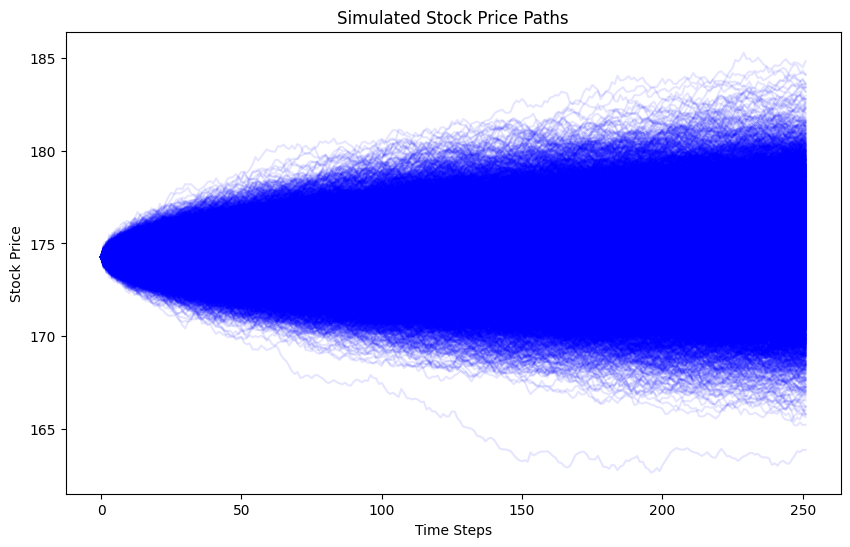

In [105]:
# Simulate multiple paths and plot them
simulated_paths = simulate_multiple_paths(S0, mu, sigma, T, N, M)
plot_simulation_paths(simulated_paths)

In [106]:
########### Implement Option Pricing Models ########### 

In [107]:
# 1) European Option Pricing (Call Option)

def european_option_pricing(paths, K):
    payoffs = []
    for path in paths:
        # Final stock price at maturity
        final_price = path[-1]
        print(f"Final Price: {final_price}")  # Debug statement
        # Payoff for a call option
        payoff = max(final_price - K, 0)
        print(f"Payoff: {payoff}")  # Debug statement
        payoffs.append(payoff)
    return payoffs

In [108]:
# 2) Asian Option Pricing (Call Option)

def asian_option_pricing(paths, k):
    payoffs=[]
    for path in paths:
         # Average stock price over all time steps
        average_price = sum(path) / len(path)
        #Payoff of call option
        payoff=max(average_price - k, 0)
        payoffs.append(payoff)
    return payoffs

In [109]:
# 3) Barrier Option Pricing (Knock-In Call Option)

def barrier_option_pricing(paths, K, barrier_level):
    payoffs = []
    for path in paths:
        # Check if the barrier level is breached
        max_price = max(path)
        print(f"Max Price in Path: {max_price}")  # Debug statement
        if max_price >= barrier_level:
            # Final stock price at maturity
            final_price = path[-1]
            print(f"Final Price: {final_price}")  # Debug statement
            # Payoff for a call option
            payoff = max(final_price - K, 0)
        else:
            payoff = 0
        print(f"Payoff: {payoff}")  # Debug statement
        payoffs.append(payoff)
    return payoffs

In [116]:
# Calculate Option Price

def calculate_option_price(payoffs, r, T):
    # Calculate the discounted average payoff
    discounted_payoff = [payoff * math.exp(-r * T) for payoff in payoffs]
    option_price = sum(discounted_payoff) / len(discounted_payoff)
    return option_price

In [ ]:
# Parameters
S0 = 100  # Initial stock price
mu = 0.05  # Expected return
sigma = 0.2  # Volatility
T = 1  # Time period (1 year)
N = 252  # Number of time steps (daily)
M = 10  # Number of paths
K = 105  # Strike price
r= 0.01 #Risk-Free interest rate

# Simulate multiple paths
paths = simulate_multiple_paths(S0, mu, sigma, T, N, M)

# Calculate European call option payoffs
payoffs = european_option_pricing(paths, K)

# Print the payoffs
print("Payoffs:", payoffs)

Final Price: 92.62018287868072
Payoff: 0
Final Price: 122.78754094742231
Payoff: 17.787540947422315
Final Price: 114.75631957819749
Payoff: 9.756319578197491
Final Price: 99.02628360361341
Payoff: 0
Final Price: 111.66700156225178
Payoff: 6.667001562251784
Final Price: 104.12137004307695
Payoff: 0
Final Price: 108.65441585253582
Payoff: 3.65441585253582
Final Price: 73.67221296415342
Payoff: 0
Final Price: 159.38301806232408
Payoff: 54.38301806232408
Final Price: 106.34636450818908
Payoff: 1.3463645081890832
Payoffs: [0, 17.787540947422315, 9.756319578197491, 0, 6.667001562251784, 0, 3.65441585253582, 0, 54.38301806232408, 1.3463645081890832]


In [117]:
# European option pricing
european_payoffs = european_option_pricing(paths, K)
european_option_price = calculate_option_price(european_payoffs, r, T)
print(f"European Option Price: {european_option_price}")


European Option Price: 9.266337807864675


In [118]:
# Asian option pricing
asian_payoffs = asian_option_pricing(paths, K)
asian_option_price = calculate_option_price(asian_payoffs, r, T)
print(f"Asian Option Price: {asian_option_price}")

Asian Option Price: 2.894544234172067


In [119]:
# Barrier option pricing (using a barrier level)
barrier_level = 150  # Example barrier level (adjusted to be more reasonable)
barrier_payoffs = barrier_option_pricing(paths, K, barrier_level)
barrier_option_price = calculate_option_price(barrier_payoffs, r, T)
print(f"Barrier Option Price: {barrier_option_price}")

Barrier Option Price: 5.384189799138197
